<a href="https://colab.research.google.com/github/mishraraaj/Loan-Default-Prediction/blob/main/raj_mishra_Team_2_Capstone_Project_2_Loan_Default_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Loan Default Prediction : Predicting whether a customer will default on a loan.</u></b>

### Numerous companies from financial indutry often invest considerable resources to improve their predictive models with the aim of having better insights into their customers. Such an interest in model improvement has intensified in recent years mostly because of fast development of machine learning and artificial intelligence. For standard lending institution default predictive model with high performance helps to considerably minimize Credit Loss, resulting in higher revenue and profits. Usually the better predictive model the more efficient is the underwriting policy and collection process. A well-functioning model should distinguish creditworthy customers from those that are credit risks. Often, more-predictive credit-decisioning model can identify a greater number of customers within an institution’s specified risk tolerance, which should expand revenues as well.

### In this project the goal is to increase detection of defaulted loans before the loan is issued/offered by P2P lending company - Lending Club. Peer-to-peer lending differs from traditional financial institutions like banks or commercial lending companies.

### So, Lending Club is a mediator between investors and borrowers, earning money by charging both. The main Lending Club interest is to attract more clients and maintain protfolio size. The motivation of borrowers is clear, they want to find as cheap capital as possible, so they're seeking for the best offer at the market, which is available for them. In case of investors the motivation is obvious as well. Investors look for high ROI (return of investments), but remembering that returns are proportional to risks, we may formalize saying, that investors look for appropriate returns/risks ratio. If investors experience losses it may cause churn rate growth.

### The underwriting process for Lending Club looks like this. Borrower applies for the loan, then if he/she meets all the basic requirements - Lending Club using their scoring model assigns client to respective grade. There are 7 grades and 35 sub-grades. Interest rate is dependent on sub-grade. After that, Lending Club gives access to the loan for investors with information about the loan and the borrower (incl. grade and sub-grade) and investors decide whether or not to invest money in this loan. The lower the grade the higher the interest rate, which means, that investors may take higher risks to gain potentially higher returns.

### Seeking for default rate reduction we can end up with too restrictive underwriting policy which does not neccessary correlate with higher ROI for investors, because we'll not let investors choose risky loans, which means lower interests. For Lending Club it probably means the loss of investors with high risk appetite and borrowers with weak credit history, or in case of Lending Club those who need higher loan amount.

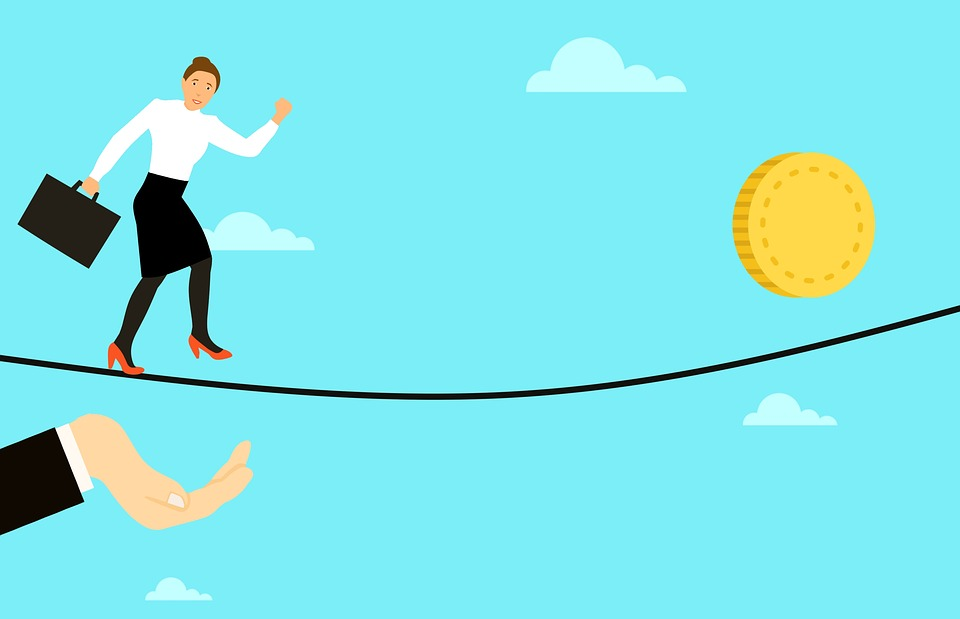

# Problem Statement Analysis
### Loan default occurs when a borrower fails to pay back a debt according to the initial arrangement. In the case of most consumer loans, this means that successive payments have been missed over the course of weeks or months. Fortunately, lenders and loan servicers usually allow a grace period before penalizing the borrower after missing one payment. The period between missing a loan payment and having the loan default is known as delinquency. The delinquency period gives the debtor time to avoid default by contacting their loan servicer or making up missed payments.

Defaulting on a loan will cause a substantial and lasting drop in the debtor's credit score, as well as extremely high interest rates on any future loan. For loans secured with collateral, defaulting will likely result in the pledged asset being seized by the bank. The most popular types of consumer loans that are backed by collateral are mortgages, auto loans and secured personal loans. For unsecured debts like credit cards and student loans, the consequences of default vary in severity according to the type of loan. In the most extreme cases, debt collection agencies can garnish wages to pay back the outstanding debt.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")


In [ ]:
import pandas as pd
Working_dir="/content/drive/MyDrive/AlmaBetter/Cohort Aravali/Module 4/Week 1/"
LCD_df=pd.read_csv(Working_dir+'LCDataDictionary.csv')

lending_club_df=pd.read_csv(Working_dir+'lending_club_loans.csv',skiprows=1,
                            low_memory=False)


In [ ]:
df=lending_club_df.copy()

In [ ]:
LCD_df.head()

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower i...
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan...
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by th...


In [ ]:
lending_club_df.head(2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,...,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599.0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,735.0,739.0,1.0,NaN,NaN,3.0,0.0,13648.0,83.7%,9.0,f,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167.0,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,740.0,744.0,5.0,NaN,NaN,3.0,0.0,1687.0,9.4%,4.0,f,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [ ]:
lending_club_df.shape

(42538, 115)

BAsed Upon this we can make our dependent variable

In [ ]:
df.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,...,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,4.253500e+04,42535.000000,42535.000000,42535.000000,42535.000000,4.253100e+04,42535.000000,42506.000000,42535.000000,42535.000000,42506.000000,15609.000000,3651.000000,42506.000000,42506.000000,4.253500e+04,42506.000000,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000,42390.0,0.0,42535.0,0.0,0.0,0.0,42506.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42390.0,42506.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41170.000000,42430.000000,0.0,0.0,0.0,0.0
mean,8.257026e+05,11089.722581,10821.585753,10139.830603,322.623063,6.913656e+04,13.373043,0.152449,713.052545,717.052545,1.081424,35.017618,59.175568,9.343951,0.058156,1.429786e+04,22.124406,11.849562,11.815891,12005.641023,11298.592611,9664.271346,2239.547094,1.515321,100.307353,13.956737,2612.720097,689.305302,676.382744,0.0,NaN,1.0,NaN,NaN,NaN,0.000094,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.143039,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.045227,0.000024,NaN,NaN,NaN,NaN
std,2.795409e+05,7410.938391,7146.914675,7131.686447,208.927216,6.409635e+04,6.726315,0.512406,36.188439,36.188439,1.527455,22.418427,47.145396,4.496274,0.245713,2.201844e+04,11.592811,125.376563,125.061859,9067.243728,9010.323570,7087.469380,2583.722104,7.827800,718.078716,159.621861,4385.198940,80.202882,119.011555,0.0,NaN,0.0,NaN,NaN,NaN,0.009700,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,29.359579,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.208737,0.004855,NaN,NaN,NaN,NaN
min,7.047300e+04,500.000000,500.000000,0.000000,15.670000,1.896000e+03,0.000000,0.000000,610.000000,614.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,1.0,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,6.384795e+05,5200.000000,5000.000000,4950.000000,165.520000,4.000000e+04,8.200000,0.000000,685.000000,689.000000,0.000000,17.000000,0.000000,6.000000,0.000000,3.635000e+03,13.000000,0.000000,0.000000,5462.787435,4791.415000,4400.000000,657.100000,0.000000,0.000000,0.000000,211.370000,644.000000,640.000000,0.0,NaN,1.0,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

LendingClub made money by charging borrowers an origination fee and investors a service fee. The size of the origination fee depended on the credit grade and ranges to be 1.1–5.0% of the loan amount. The size of the service fee was 1% on all amounts the borrower pays.

Fully Paid                                             33586
Charged Off                                             5653
Does not meet the credit policy. Status:Fully Paid      1988
Does not meet the credit policy. Status:Charged Off      761
Current                                                  513
In Grace Period                                           16
Late (31-120 days)                                        12
Late (16-30 days)                                          5
Default                                                    1
Name: loan_status, dtype: int64


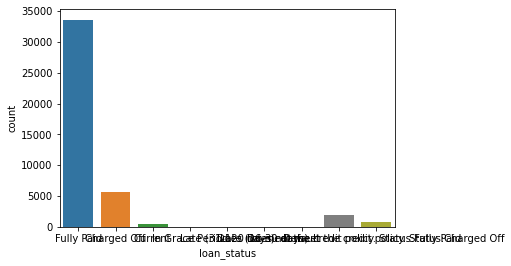

In [ ]:
print(df['loan_status'].value_counts())
sns.countplot(df['loan_status'])

In [ ]:
df['loan_status'].isna().sum()

3

In [ ]:
df[df['loan_status'].isna()]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,...,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
39786,Loans that do not meet the credit policy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42536,Total amount funded in policy code 1: 460296150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42537,Total amount funded in policy code 2: 0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df=df[~df['loan_status'].isna()]

In [ ]:
dic = {"loan_status":{ "Fully Paid": 0, "Charged Off": 1,'Does not meet the credit policy. Status:Fully Paid':1,
'Does not meet the credit policy. Status:Charged Off':1,'In Grace Period':1,'Late (31-120 days)':1 ,'Late (16-30 days)':1,'Default':1}}
df = df.replace(dic)

Removing the customers Whose current period is going on

In [ ]:
df=df[df["loan_status"]!='Current']

In [ ]:
df['loan_status']=df['loan_status'].astype(int)

## Removing Featues With 99% nan values

In [ ]:
columns_wit99nans=df[df.columns[df.isnull().mean() > 0.99]].columns.to_list()

These doent contains asy of information Even For Good Imputations

In [ ]:
df.drop(columns=columns_wit99nans,inplace=True)

In [ ]:
dic= dict(zip(LCD_df["LoanStatNew"], LCD_df['Description']))

## Understanding **Features**

In [ ]:
LCD_df.shape

(117, 2)

In [ ]:
features=[]
for n,i in enumerate(df.columns.to_list()):

    print(f'{n}:{i}:-{dic[i]}')
    features.append(i)

0:id:-A unique LC assigned ID for the loan listing.
1:member_id:-A unique LC assigned Id for the borrower member.
2:loan_amnt:-The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
3:funded_amnt:-The total amount committed to that loan at that point in time.
4:funded_amnt_inv:-The total amount committed by investors for that loan at that point in time.
5:term:-The number of payments on the loan. Values are in months and can be either 36 or 60.
6:int_rate:-Interest Rate on the loan
7:installment:-The monthly payment owed by the borrower if the loan originates.
8:grade:-LC assigned loan grade
9:sub_grade:-LC assigned loan subgrade
10:emp_title:-The job title supplied by the Borrower when applying for the loan.*
11:emp_length:-Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 
12:home_ownershi

In [ ]:
df.head(2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599.0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,0,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,735.0,739.0,1.0,NaN,NaN,3.0,0.0,13648.0,83.7%,9.0,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.0,0.00,0.00,Jan-2015,171.62,NaN,Sep-2016,744.0,740.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
1,1077430,1314167.0,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,1,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,740.0,744.0,5.0,NaN,NaN,3.0,0.0,1687.0,9.4%,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-2013,119.66,NaN,Sep-2016,499.0,0.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0


acc_now_delinq:For the perspective of a credit card company, a particular credit card is said to be delinquent if the customer in question has failed to make their minimum monthly payment for 30 days from their original due date


all_util- The balance-to-limit ratio is also known as credit utilization ratio, and is used in the calculation of credit scores. Having a low ratio both overall and on each card can improve your credit score.

### **What Is a Line of Credit (LOC)?**

A line of credit (LOC) is a preset borrowing limit that can be used at any time. The borrower can take money out as needed until the limit is reached, and as money is repaid, it can be borrowed again in the case of an open line of credit.
### **Derogatory Public Record**

The only type of public record information that would appear on your credit report is a bankruptcy filing., Bankruptcy information is collected and updated regularly from the courts. Filing for bankruptcy is considered derogatory because you are telling all your lenders that you will not be able to pay them in full, or at all.

### **Revolving balance**
In credit card terms, a revolving balance is the portion of credit card spending that goes unpaid at the end of a billing cycle. The amount can vary, going up or down depending on the amount borrowed and the amount repaid.


## What Is a Charge-Off?
A charge-off is a debt, for example on a credit card, that is deemed unlikely to be collected by the creditor because the borrower has become substantially delinquent after a period of time. However, a charge-off does not mean a write-off of the debt entirely. Having a charge-off can mean serious repercussions on your credit history and future borrowing ability.



## **The outstanding principal balance**
The outstanding principal balance of a mortgage is simply the total amount of money it would take to pay off the loan in full. How much this amount is depends on how much was originally borrowed, how much has been paid down, and what the annual interest rate is.

In [ ]:
non_numeric_ls=list(set(df.columns.to_list())-set(df.describe().columns.to_list()))
df[non_numeric_ls].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42022 entries, 0 to 42535
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   home_ownership       42022 non-null  object
 1   purpose              42022 non-null  object
 2   title                42009 non-null  object
 3   desc                 28916 non-null  object
 4   term                 42022 non-null  object
 5   next_pymnt_d         2783 non-null   object
 6   url                  42022 non-null  object
 7   last_pymnt_d         41939 non-null  object
 8   int_rate             42022 non-null  object
 9   revol_util           41932 non-null  object
 10  sub_grade            42022 non-null  object
 11  emp_title            39433 non-null  object
 12  verification_status  42022 non-null  object
 13  emp_length           40929 non-null  object
 14  pymnt_plan           42022 non-null  object
 15  application_type     42022 non-null  object
 16  grad

In [ ]:
for i in non_numeric_ls:
    if (len(df[i].value_counts())<10) or (len(df[i].value_counts())>38285):
        print(df[i].value_counts())

RENT        19991
MORTGAGE    18669
OWN          3218
OTHER         136
NONE            8
Name: home_ownership, dtype: int64
 36 months    31534
 60 months    10488
Name: term, dtype: int64
https://lendingclub.com/browse/loanDetail.action?loan_id=801448     1
https://lendingclub.com/browse/loanDetail.action?loan_id=760850     1
https://lendingclub.com/browse/loanDetail.action?loan_id=470125     1
https://lendingclub.com/browse/loanDetail.action?loan_id=447490     1
https://lendingclub.com/browse/loanDetail.action?loan_id=728245     1
                                                                   ..
https://lendingclub.com/browse/loanDetail.action?loan_id=459573     1
https://lendingclub.com/browse/loanDetail.action?loan_id=466600     1
https://lendingclub.com/browse/loanDetail.action?loan_id=688547     1
https://lendingclub.com/browse/loanDetail.action?loan_id=1062418    1
https://lendingclub.com/browse/loanDetail.action?loan_id=614599     1
Name: url, Length: 42022, dtype: int64
N

Removing Columns That contains only One unique value 99% diffrent value such columns coesn't have any relation or any pattern

In [ ]:
non_unique_ls=['initial_list_status','id','url','application_type','pymnt_plan']
features=list(set(features)-set(non_unique_ls))
df.drop(columns=non_unique_ls,inplace=True)

In [ ]:
df[features].describe()

,out_prncp,inq_last_6mths,total_pymnt_inv,loan_amnt,annual_inc,member_id,recoveries,total_rec_late_fee,dti,delinq_2yrs,revol_bal,total_rec_int,pub_rec,total_acc,policy_code,installment,last_pymnt_amnt,tax_liens,loan_status,funded_amnt,pub_rec_bankruptcies,out_prncp_inv,total_rec_prncp,fico_range_high,mths_since_last_record,delinq_amnt,collection_recovery_fee,last_fico_range_low,mths_since_last_delinq,funded_amnt_inv,collections_12_mths_ex_med,last_fico_range_high,total_pymnt,fico_range_low,open_acc,chargeoff_within_12_mths,acc_now_delinq
count,42022.000000,41993.000000,42022.000000,42022.000000,4.201800e+04,4.202200e+04,42022.000000,42022.000000,42022.000000,41993.000000,4.202200e+04,42022.000000,41993.000000,41993.000000,42022.0,42022.000000,42022.000000,41917.000000,42022.000000,42022.000000,40657.000000,42022.000000,42022.000000,42022.000000,3635.000000,41993.000000,42022.000000,42022.000000,15453.000000,42022.000000,41877.0,42022.000000,42022.000000,42022.000000,41993.000000,41877.0,41993.000000
mean,0.904825,1.085181,11134.294299,11003.199515,6.905678e+04,8.208680e+05,101.531895,1.513398,13.352840,0.152621,1.425350e+04,2170.291186,0.058438,22.111233,1.0,321.305139,2639.262375,0.000024,0.200752,10735.310076,0.045429,0.902471,9574.956695,717.020442,59.014305,0.144786,14.127120,676.198539,34.986346,10046.288795,0.0,689.206558,11848.293081,713.020442,9.338390,0.0,0.000095
std,41.165506,1.532327,8835.034960,7350.404514,6.431103e+04,2.776740e+05,722.362582,7.803031,6.725271,0.512486,2.207401e+04,2467.540239,0.246165,11.604466,0.0,208.499994,4405.166077,0.004884,0.400568,7083.436687,0.208953,41.063500,7025.340102,36.217698,47.173153,29.538368,160.585757,119.368904,22.423356,7060.973752,0.0,80.287861,8902.616545,36.217698,4.499887,0.0,0.009759
min,0.000000,0.000000,0.000000,500.000000,1.896000e+03,7.047300e+04,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000,1.0,15.670000,0.000000,0.000000,0.000000,500.000000,0.000000,0.000000,0.000000,614.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,610.000000,1.000000,0.0,0.000000
25%,0.000000,0.000000,4743.827500,5025.000000,4.000000e+04,6.360872e+05,0.000000,0.000000,8.170000,0.000000,3.608000e+03,649.525000,0.000000,13.000000,1.0,164.910000,210.442500,0.000000,0.000000,5000.000000,0.000000,0.000000,4325.000000,689.000000,0.000000,0.000000,0.000000,640.000000,17.000000,4925.000000,0.0,644.000000,5428.767456,685.000000,6.000000,0.0,0.000000
50%,0.000000,1.000000,8864.880000,9600.000000,5.862900e+04,8.212295e+05,0.000000,0.000000,13.450000,0.000000,8.773000e+03,1320.715000,0.000000,20.000000,1.0,276.230000,533.280000,0.000000,0.000000,9450.000000,0.000000,0.000000,8000.000000,714.000000,85.000000,0.000000,0.000000,695.000000,33.000000,8400.000000,0.0,699.000000,9579.480283,710.000000,9.000000,0.0,0.000000
75%,0.000000,2.000000,15285.300000,15000.000000,8.200000e+04,1.026594e+06,0.000000,0.000000,18.660000,0.000000,1.715250e+04,2728.342500,0.000000,29.000000,1.0,425.205000,3231.210000,0.000000,0.000000,15000.000000,0.000000,0.000000,13050.000000,744.000000,101.000000,0.000000,0.000000,740.000000,51.000000,14000.000000,0.0,744.000000,16191.731751,740.000000,12.000000,0.0,0.000000
max,3555.850000,33.000000,58563.680000,35000.000000,6.000000e+06,1.314167e+06,29623.350000,209.000000,29.990000,13.000000,1.207359e+06,23563.680000,5.000000,90.000000,1.0,1305.190000,36115.200000,1.000000,1.000000,35000.000000,2.000000,3553.300000,35000.020000,829.000000,129.000000,6053.000000,7002.190000,845.000000,120.000000,35000.000000,0.0,850.000000,58563.679929,825.000000,47.000000,0.0,1.000000


In [ ]:
numerical_columns=df.describe().columns.to_list()

In [ ]:
for i in numerical_columns:
    if (len(df[i].value_counts())<10) or (len(df[i].value_counts())>38285):
        print(df[i].value_counts())

786429.0     1
907293.0     1
939013.0     1
1222664.0    1
545795.0     1
            ..
774705.0     1
698828.0     1
1026506.0    1
567753.0     1
777567.0     1
Name: member_id, Length: 42022, dtype: int64
0    33586
1     8436
Name: loan_status, dtype: int64
0.0    39633
1.0     2284
2.0       62
3.0       11
4.0        2
5.0        1
Name: pub_rec, dtype: int64
0.000000        21
12029.450000     6
11804.689321     3
11437.691445     3
5981.389324      3
                ..
20664.877628     1
3285.054008      1
8050.546151      1
4273.960731      1
5791.128539      1
Name: total_pymnt, Length: 41873, dtype: int64
0.00        299
6514.52      16
13148.14     14
5478.39      14
11196.57     12
           ... 
18080.13      1
8414.78       1
3633.88       1
4095.45       1
24376.79      1
Name: total_pymnt_inv, Length: 39598, dtype: int64
0.0    41877
Name: collections_12_mths_ex_med, dtype: int64
1.0    42022
Name: policy_code, dtype: int64
0.0    41989
1.0        4
Name: acc_now_de

In [ ]:
non_unique_ls=['member_id','pub_rec','tax_liens','policy_code','collections_12_mths_ex_med',
               'acc_now_delinq','chargeoff_within_12_mths','delinq_amnt']
features=list(set(features)-set(non_unique_ls))
df.drop(columns=non_unique_ls,inplace=True)

Removing Columns That contains only One unique value 99% diffrent value such columns coesn't have any relation or any pattern

In [ ]:
df.head(2)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,pub_rec_bankruptcies
0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,0,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,735.0,739.0,1.0,NaN,NaN,3.0,13648.0,83.7%,9.0,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.0,0.00,0.00,Jan-2015,171.62,NaN,Sep-2016,744.0,740.0,0.0
1,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,1,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,740.0,744.0,5.0,NaN,NaN,3.0,1687.0,9.4%,4.0,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-2013,119.66,NaN,Sep-2016,499.0,0.0,0.0


In [ ]:
date_time=['last_pymnt_d','last_credit_pull_d','issue_d','next_pymnt_d','earliest_cr_line']
df[date_time]=df[date_time].apply(pd.to_datetime, errors='coerce')  # To Put Nan For Missing Values

In [ ]:
for i in  date_time:
    df[i[:-1]+'_year'] = df[i].dt.year
    df[i[:-1]+'_mon'] = df[i].dt.month

In [ ]:

new_date_time=[i[:-1]+'_year' for i in date_time]
new_date_time.extend([i[:-1]+'_mon' for i in date_time])
df[new_date_time]

,last_pymnt__year,last_credit_pull__year,issue__year,next_pymnt__year,earliest_cr_lin_year,last_pymnt__mon,last_credit_pull__mon,issue__mon,next_pymnt__mon,earliest_cr_lin_mon
0,2015.0,2016.0,2011,NaN,1985.0,1.0,9.0,12,NaN,1.0
1,2013.0,2016.0,2011,NaN,1999.0,4.0,9.0,12,NaN,4.0
2,2014.0,2016.0,2011,NaN,2001.0,6.0,9.0,12,NaN,11.0
3,2015.0,2016.0,2011,NaN,1996.0,1.0,4.0,12,NaN,2.0
5,2015.0,2016.0,2011,NaN,2004.0,1.0,1.0,12,NaN,11.0
...,...,...,...,...,...,...,...,...,...,...
42531,2008.0,2013.0,2007,2008.0,NaN,3.0,2.0,6,3.0,NaN
42532,2010.0,2014.0,2007,2010.0,NaN,6.0,9.0,6,7.0,NaN
42533,2010.0,2007.0,2007,2010.0,NaN,6.0,5.0,6,7.0,NaN
42534,2010.0,2007.0,2007,2010.0,NaN,6.0,8.0,6,7.0,NaN


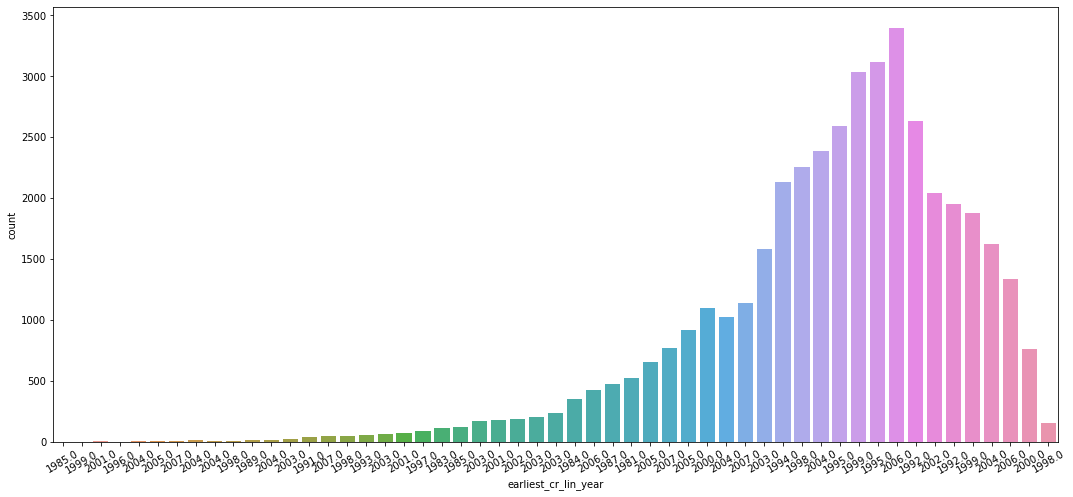

In [ ]:
plt.figure(figsize=(18,8))
g=sns.countplot(x='earliest_cr_lin_year',data=df).set_xticklabels(labels=df['earliest_cr_lin_year'],rotation=30)


In [ ]:
from sklearn.preprocessing import LabelEncoder
df[new_date_time]=df[new_date_time].apply(LabelEncoder().fit_transform)

In [ ]:
features=list(set(features)-set(date_time))
features=features+new_date_time

In [ ]:
df.drop(columns=date_time,inplace=True)
df.head(2)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,loan_status,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,pub_rec_bankruptcies,last_pymnt__year,last_pymnt__mon,last_credit_pull__year,last_credit_pull__mon,issue__year,issue__mon,next_pymnt__year,next_pymnt__mon,earliest_cr_lin_year,earliest_cr_lin_mon
0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,0,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,735.0,739.0,1.0,NaN,NaN,3.0,13648.0,83.7%,9.0,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.0,0.00,0.00,171.62,744.0,740.0,0.0,8,0,9,8,4,11,18255,18257,29,0
1,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,1,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,740.0,744.0,5.0,NaN,NaN,3.0,1687.0,9.4%,4.0,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,119.66,499.0,0.0,0.0,6,3,9,8,4,11,25247,25249,43,3


Contains Only One Value Throug Out So we can remove This Column as well


In [ ]:
non_numeric_ls=list(set(df.columns.to_list())-set(df.describe().columns.to_list()))

In [ ]:
non_numeric_ls

In [ ]:
categorical_value= non_numeric_ls
for i in categorical_value:
    print(df[i].value_counts())

These The Discrete value Conataining Columns

## LabelEncoding these columns

In [ ]:

df['revol_util'] = df['revol_util'].str.replace('%', '')
df['int_rate'] = df['int_rate'].str.replace('%', '')


In [ ]:
df['revol_util']=df['revol_util'].astype(float)

In [ ]:
df['int_rate']=df['int_rate'].astype(float)


In [ ]:
categorical_value=list(set(categorical_value)-set(['int_rate','revol_util','desc','emp_title','loan_status','title','home_ownership']))

desc is filled by users and contains all diffrent value

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df[categorical_value]=df[categorical_value].astype(str)


In [ ]:
home_ownership_val=pd.get_dummies(df['home_ownership']).columns.to_list()
df[home_ownership_val]=pd.DataFrame(pd.get_dummies(df['home_ownership']))

Removing Dummy TRap And Redundant features

In [ ]:
df=df.drop(columns=['home_ownership','desc','emp_title','title','NONE'])

In [ ]:
from sklearn.preprocessing import LabelEncoder
df[categorical_value]=df[categorical_value].apply(LabelEncoder().fit_transform)

In [ ]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
scaler = MinMaxScaler()
df[categorical_value] = scaler.fit_transform(df[categorical_value])
df[categorical_value]

In [ ]:
df.info()

In [ ]:
df[list(set(home_ownership_val)-set(['NONE']))]=df[list(set(home_ownership_val)-set(['NONE']))].astype(int)

In [ ]:
import numpy as np

l=['red','blue','green','orange']
for col in df.columns.to_list():
        fig = plt.figure(figsize=(9, 6))
        ax = fig.gca()
        feature = df[col]

        sns.distplot(x=feature,color=l[np.random.randint(0,4)])
        plt.xlabel(col)

In [ ]:
df.columns

In [ ]:
plt.figure(figsize=(35,30))
matrix = np.triu(df.corr())
sns.heatmap(df.corr(),annot=True,fmt='.1g',robust=True,cmap='coolwarm', linewidths=2, linecolor='black',mask=matrix)
plt.show()

In [ ]:
df.columns

In [ ]:
df[['out_prncp','out_prncp_inv','last_pymnt__year','total_pymnt_inv']].corr()

In [ ]:
df.corr().loc[:,'loan_status']

## Imputing Missing Values USing Knn

In [ ]:
columns_wit90nans=df[df.columns[df.isnull().mean() > 0.9]].columns.to_list()

In [ ]:
columns_wit90nans

In [ ]:
df=df.drop(columns=columns_wit90nans)

In [ ]:
df.isna().sum()

In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5, weights='distance', metric='nan_euclidean')

In [ ]:
X=df.values

In [ ]:
imputer.fit(X)

In [ ]:
Xtrans = imputer.transform(X)

In [ ]:
Xtrans.shape

In [ ]:
df=pd.DataFrame(Xtrans,columns=df.columns.to_list())

In [ ]:
sns.distplot(df['mths_since_last_delinq'])

In [ ]:
set(df.columns.to_list())-set(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_length', 'annual_inc', 'loan_status', 'purpose', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'last_fico_range_high',
       'last_fico_range_low', 'pub_rec_bankruptcies', 'fico_range_avg',
       'earliest_cr_line_month', 'earliest_cr_line_year',
       'last_credit_pull_d_month', 'last_credit_pull_d_year','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries',
                         'collection_recovery_fee','out_prncp','out_prncp_inv','last_pymnt_amnt'])

These Columns Are Exactly similar and create redundancy

# Base Line Model

In [ ]:
df.shape

Taking %50 Fully paid values to do Under sampling

In [ ]:
fully_paid=df[df['loan_status']==0]
not_reliable=df[df['loan_status']==1]

In [ ]:
fully_paid = fully_paid.sample(frac=0.50,axis='rows')
fully_paid

In [ ]:
df.columns

In [ ]:
X=df.drop(['loan_status'],axis=1).values
y=df.loan_status

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state=1)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [ ]:
y_train.value_counts()

In [ ]:
import xgboost as xgb

xgb_clf = xgb.XGBClassifier(tree_method = "exact", predictor = "cpu_predictor",
                            objective = "multi:softmax")

# Create parameter grid
parameters = {"learning_rate": [0.1, 0.01, 0.001],
               "gamma" : [0.01, 0.1, 0.3, 0.5, 1, 1.5, 2],
               "max_depth": [2, 4, 7, 10],
               "colsample_bytree": [0.3, 0.6, 0.8, 1.0],
               "subsample": [0.2, 0.4, 0.5, 0.6, 0.7],
               "reg_alpha": [0, 0.5, 1],
               "reg_lambda": [1, 1.5, 2, 3, 4.5],
               "min_child_weight": [1, 3, 5, 7],
               "n_estimators": [100, 250, 500, 1000],
              'num_class':[2] }

from sklearn.model_selection import RandomizedSearchCV
# Create RandomizedSearchCV Object
xgb_rscv = RandomizedSearchCV(xgb_clf, param_distributions = parameters, scoring = "f1_micro",
                             cv = 10, verbose = 3, random_state = 40 )

# Fit the model
model_xgboost = xgb_rscv.fit(X_train,y_train)


In [ ]:
# Fit the model
model_xgboost = xgb_rscv.fit(X_train, y_train)

In [ ]:
# make predictions for test data
y_pred = model_xgboost.predict(x_test)
print(classification_report(y_test,y_pred))
train_cm = confusion_matrix(y_test,y_pred)
sns.heatmap(train_cm,annot=True)

In [ ]:
plot_precision_recall_vs_threshold(precision, recall, thresholds)

In [ ]:
prams={'bootstrap': True,
 'max_depth': 9,
 'min_samples_leaf': 45,
 'min_samples_split': 60,
 'n_estimators': 120}


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
rf=RandomForestClassifier()

rf = RandomForestClassifier( bootstrap= True,max_depth= 9,min_samples_leaf= 45,min_samples_split= 60,n_estimators= 120)



In [ ]:
rf.fit(X_train,y_train)

In [ ]:
from sklearn.metrics import classification_report,accuracy_score,roc_auc_score,confusion_matrix

In [ ]:
# make predictions for test data
y_pred = rf.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

In [ ]:

print(classification_report(y_test,y_pred))

In [ ]:
classification_report

In [ ]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

In [ ]:
train_cm = confusion_matrix(y_test,y_pred)
sns.heatmap(train_cm,annot=True)

In [ ]:
importances=rf.feature_importances_[:20]

In [ ]:


indices = np.argsort(importances)

In [ ]:
features = df.drop('loan_status',axis=1).columns.to_list()

In [ ]:
plt.figure(figsize=(10,8))
plt.title('Feature Importance')

plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

Since it is proper case of imbalance we can use Svms to using class weight params

In [ ]:
from sklearn.svm import SVC

# we can add class_weight='balanced' to add penalize mistake
svc_model = SVC(class_weight='balanced', probability=True)

svc_model.fit(X_train, y_train)


In [ ]:
y_pred = svc_model.predict(X_test)

In [ ]:

print(classification_report(y_test,y_pred))

In [ ]:
train_cm = confusion_matrix(y_test,y_pred)
sns.heatmap(train_cm,annot=True)

Using Svm With Class weight really did'nt performed well , so we can use snote to balance the data first and thenn Apply artificial Neuaral network

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(df.drop('loan_status',axis=1), df['loan_status'])

In [ ]:
# Splitting the dataset into the Training set and Test set
x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size = 0.2, random_state = 3)

In [ ]:
rf=RandomForestClassifier()

rf = RandomForestClassifier( bootstrap= True,max_depth= 9,min_samples_leaf= 45,min_samples_split= 60,n_estimators= 120)
rf.fit(x_train, y_train)

In [ ]:
# make predictions for test data
y_pred = rf.predict(x_test)
print(classification_report(y_test,y_pred))


In [ ]:
train_cm = confusion_matrix(y_test,y_pred)
sns.heatmap(train_cm,annot=True)

In [ ]:
std=StandardScaler()
X_train=std.fit_transform(x_train)
X_test=std.fit_transform(x_test)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.constraints import max_norm
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model
model = Sequential()

# input layer
model.add(Dense(80,activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(46,activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(20,activation='relu'))
model.add(Dropout(0.2))

# output layer
model.add(Dense(1, activation='sigmoid'))

# compile model
model.compile(optimizer="adam", loss='binary_crossentropy')


In [ ]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)
model.fit(x=X_train, 
          y=y_train, 
          epochs=200,

          batch_size=256,
          callbacks=[early_stop])

In [ ]:
y_pred=model.predict(x_test).reshape(-1)

In [ ]:
y_pred

In [ ]:
print(classification_report(y_test, y_pred.round()))

In [ ]:
train_cm = confusion_matrix(y_test,y_pred.round())
sns.heatmap(train_cm,annot=True)

Ann Is not performing well even After Applying snote 

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.metrics import classification_report,recall_score,accuracy_score,precision_score

In [ ]:
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
lr=LogisticRegression()
gbc=GradientBoostingClassifier()
xgb=XGBClassifier()
svc=SVC()
knn=KNeighborsClassifier()
nb=GaussianNB()
models=[dt,rf,lr,gbc,xgb,svc,knn,nb]
def score_model(X_train, X_test, y_train, y_test):
    df_columns=[]
    df=pd.DataFrame(columns=df_columns)
    i=0
    #read model one by one
    for model in models:
        model.fit(X_train,y_train)
        y_pred=model.predict(X_test)
        
        #compute metrics
        train_accuracy=model.score(X_train,y_train)
        test_accuracy=model.score(X_test,y_test)
        
        p_score=metrics.precision_score(y_test,y_pred)
        r_score=metrics.recall_score(y_test,y_pred)
        f1_score=metrics.f1_score(y_test,y_pred)
        fp, tp, th = metrics.roc_curve(y_test, y_pred)
        
        #insert in dataframe
        df.loc[i,"Model_Name"]=model.__class__.__name__
        df.loc[i,"Precision"]=round(p_score,2)
        df.loc[i,"Recall"]=round(r_score,2)
        df.loc[i,"Train_Accuracy"]=round(train_accuracy,2)
        df.loc[i,"Test_Accuracy"]=round(test_accuracy,2)
        df.loc[i,"F1_Score"]=round(f1_score,2)
        df.loc[i,'AUC'] = metrics.auc(fp, tp)
        i+=1
    #sort values by accuracy
    df.sort_values(by=['F1_Score'],ascending=False,inplace=True)
    return(df)


In [ ]:
scores=score_model(X_train, X_test, y_train, y_test)

In [ ]:
scores

In [ ]:
corelation=df.corr()

In [ ]:
a=np.abs((np.identity(corelation.shape[0])+1)-2)
b=(corelation.values)

In [ ]:
corelation_0=pd.DataFrame(np.multiply(a,b),columns=corelation.columns,index=corelation.columns)

In [ ]:
corelation_0.columns

# Conclusion
After Applying Snote svms is doing realy well without even optimisation. It Is Giving High Recall And 

# the Kolmogorov-Smirnov (KS)
test statistic and the divergence statistic (refer to box "The Kolmogorov-Smirnov and Divergence Statistics").

These sorts of statistical measures are used not only to determine the overall effectiveness of a model but also to help determine the number of characteristics to include in the model. Typically, the final choice involves a tradeoff between the additional effect of a characteristic on the model's predictive accuracy and a desire to keep the complexity of the model manageable. The hold-out sample is useful in deciding the issue. Testing the model against the hold-out sample reveals whether each characteristic included in the model is predictive using data not used to construct the model. Characteristics that do not prove predictive for the hold-out sample would likely be dropped from the final model.